# **Importing all necessary libraries**

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import re
import nltk
import time

2024-05-26 09:21:30.608622: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 09:21:30.608730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 09:21:30.733558: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Defining all necessary functions**

In [ ]:
def clean_texts(texts,symbols_to_remove='123456790!@#$%^&*()`[]{};:?/.><,-_=+*~\n\t'):
    texts=texts.apply(lambda x: x.lower())
    texts=texts.apply(lambda x: x.strip())
    texts=texts.apply(lambda x: x.rstrip())
    texts=texts.apply(lambda x: nltk.word_tokenize(x))
    texts=texts.apply(lambda x: [w.replace("n't",'not') for w in x])
    for s in symbols_to_remove:
        texts=texts.apply(lambda x:[w.replace(s,'') for w in x])
    texts=texts.apply(lambda x:[w for w in x if w in words])
    texts=texts.apply(lambda x:[w for w in x if w!=''])
    return texts

In [ ]:
def run_experiment_basic_model(layer,config,EPOCHS=50,emb_dim=32):
    model=tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size,emb_dim,input_length=max_len),
                           layer(units=emb_dim,activation='leaky_relu',return_sequences=True),
                           layer(units=emb_dim,activation='leaky_relu',return_sequences=True),
                           layer(units=emb_dim,activation='leaky_relu',return_sequences=False),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=1,activation='sigmoid')])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['Accuracy'])
    start_time=time.perf_counter()
    hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
    end_time=time.perf_counter()
    elapsed_time=round(end_time-start_time,3)
    fig=plt.figure(figsize=(12,10))
    ax1=fig.add_subplot(2,1,1)
    ax1.set_title('Loss')
    ax1.grid()
    ax1.set_xlabel('Epoch')
    ax1.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['loss'],label='train',color='r')
    ax1.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['val_loss'],label='val',color='b')
    ax1.legend()
    ax2=fig.add_subplot(2,1,2)
    ax2.set_title('Accuracy')
    ax2.grid()
    ax2.set_xlabel('Epoch')
    ax2.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['Accuracy'],label='train',color='g')
    ax2.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['val_Accuracy'],label='val',color='m')
    ax2.legend()
    plt.show()
    predicted=model.evaluate(test_data)
    configs.append(config)
    test_losses.append(predicted[0])
    test_accuracies.append(predicted[1])
    times.append(elapsed_time)

In [ ]:
def run_experiment_bidirectional_model_first(layer,config,EPOCHS=50,emb_dim=32):
    model=tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size,emb_dim,input_length=max_len),
                           tf.keras.layers.Bidirectional(layer(units=emb_dim,activation='leaky_relu',return_sequences=True)),
                           layer(units=emb_dim,activation='leaky_relu',return_sequences=True),
                           layer(units=emb_dim,activation='leaky_relu',return_sequences=False),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=1,activation='sigmoid')])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['Accuracy'])
    start_time=time.perf_counter()
    hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
    end_time=time.perf_counter()
    elapsed_time=round(end_time-start_time,3)
    fig=plt.figure(figsize=(12,10))
    ax1=fig.add_subplot(2,1,1)
    ax1.set_title('Loss')
    ax1.grid()
    ax1.set_xlabel('Epoch')
    ax1.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['loss'],label='train',color='r')
    ax1.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['val_loss'],label='val',color='b')
    ax1.legend()
    ax2=fig.add_subplot(2,1,2)
    ax2.set_title('Accuracy')
    ax2.grid()
    ax2.set_xlabel('Epoch')
    ax2.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['Accuracy'],label='train',color='g')
    ax2.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['val_Accuracy'],label='val',color='m')
    ax2.legend()
    plt.show()
    predicted=model.evaluate(test_data)
    configs.append(config)
    test_losses.append(predicted[0])
    test_accuracies.append(predicted[1])
    times.append(elapsed_time)

In [ ]:
def run_experiment_bidirectional_model_all(layer,config,EPOCHS=50,emb_dim=32):
    model=tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size,emb_dim,input_length=max_len),
                           tf.keras.layers.Bidirectional(layer(units=emb_dim,activation='leaky_relu',return_sequences=True)),
                           tf.keras.layers.Bidirectional(layer(units=emb_dim,activation='leaky_relu',return_sequences=True)),
                           tf.keras.layers.Bidirectional(layer(units=emb_dim,activation='leaky_relu',return_sequences=False)),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=1,activation='sigmoid')])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['Accuracy'])
    start_time=time.perf_counter()
    hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
    end_time=time.perf_counter()
    elapsed_time=round(end_time-start_time,3)
    fig=plt.figure(figsize=(12,10))
    ax1=fig.add_subplot(2,1,1)
    ax1.set_title('Loss')
    ax1.grid()
    ax1.set_xlabel('Epoch')
    ax1.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['loss'],label='train',color='r')
    ax1.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['val_loss'],label='val',color='b')
    ax1.legend()
    ax2=fig.add_subplot(2,1,2)
    ax2.set_title('Accuracy')
    ax2.grid()
    ax2.set_xlabel('Epoch')
    ax2.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['Accuracy'],label='train',color='g')
    ax2.plot([i for i in range(1,len(hist.history['loss'])+1)],hist.history['val_Accuracy'],label='val',color='m')
    ax2.legend()
    plt.show()
    predicted=model.evaluate(test_data)
    configs.append(config)
    test_losses.append(predicted[0])
    test_accuracies.append(predicted[1])
    times.append(elapsed_time)

# **Data processing**

For this task was chosen dataset with depressive and non-depressive tweets from India: https://www.kaggle.com/datasets/mexwell/depressivenon-depressive-tweets-data

In [ ]:
words=set(nltk.corpus.words.words('en'))

In [ ]:
df=pd.read_csv('/kaggle/input/depressivenon-depressive-tweets-data/clean_tweet_Dec19ToDec20.csv')
display(df)

,Unnamed: 0,text,sentiment
0,0,text,0
1,1,rising cases of covid does not alarm me rising...,1
2,2,please vote for chicagoindiaresolution marking...,0
3,3,wishing all of you eidaladha hazrat ibrahim as...,1
4,4,daily coronavirus cases in india top for first...,1
...,...,...,...
134343,134343,happydiwali to india from dgisi and dgispr you...,1
134344,134344,india has been involved in many countries with...,1
134345,134345,does anybody know website which ships pre orde...,0
134346,134346,what hinted few weeks back in an interview wit...,0


In [ ]:
df=df.drop([0],axis=0)
df=df[df['text'].notna()]
df=df.drop(['Unnamed: 0'],axis=1).reset_index(drop=True)
display(df)

,text,sentiment
0,rising cases of covid does not alarm me rising...,1
1,please vote for chicagoindiaresolution marking...,0
2,wishing all of you eidaladha hazrat ibrahim as...,1
3,daily coronavirus cases in india top for first...,1
4,sitting here india style watching the raindrop...,0
...,...,...
134324,happydiwali to india from dgisi and dgispr you...,1
134325,india has been involved in many countries with...,1
134326,does anybody know website which ships pre orde...,0
134327,what hinted few weeks back in an interview wit...,0


## **Cleaning data**

In [ ]:
df['text']=clean_texts(df['text'])
df['sentiment']=df['sentiment'].astype(int)
df=df.where(df['text'].str.len()>0).dropna().reset_index(drop=True)
df['text']=df['text'].apply(lambda x:' '.join(x))
display(df)

,text,sentiment
0,rising of covid does not alarm me rising death...,1.0
1,please vote for marking independence of democr...,0.0
2,wishing all of you as sab ko in most of,1.0
3,daily in top for first time covid,1.0
4,sitting here style watching the hit this big a...,0.0
...,...,...
133319,to from and your real face been exposed today,1.0
133320,been involved in many with there terrorism gro...,1.0
133321,does anybody know which order season to,0.0
133322,what few back in an interview with today and w...,0.0


## **Turning data into sequnce of tokens using TensorFlow**

In [ ]:
texts=list(df['text'].values)
y=list(df['sentiment'].values)
print(texts[:10])
print(y[:10])

['rising of covid does not alarm me rising death rate does more testing capacity more are and and mild are is in scary place go check out their', 'please vote for marking independence of democracy human secularism', 'wishing all of you as sab ko in most of', 'daily in top for first time covid', 'sitting here style watching the hit this big ass pond listening to amy winehouse understand what was talking about', 'who out there that if china and had the same natural available to them as', 'very happy with the new education policy implementation in education is the basis of any country progress kudos nep', 'development partnership does not come with', 'prime minister how the new education policy will succeed this is possible only when the basic contractual teacher is mentally healthy that is why pay attention to their safe future and fair salary thank you', 'look forward to the implementation of the new education policy that to build strong and resilient blended learning is the future to']

In [ ]:
vocab_size=5000
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size,oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
print({k:v for k,v in tokenizer.word_index.items() if v<=1000})

{'<OOV>': 1, 'the': 2, 'to': 3, 'and': 4, 'of': 5, 'is': 6, 'in': 7, 'it': 8, 'you': 9, 'for': 10, 'that': 11, 'not': 12, 'my': 13, 'be': 14, 'so': 15, 'on': 16, 'are': 17, 'this': 18, 'me': 19, 'with': 20, 'but': 21, 'have': 22, 'all': 23, 'we': 24, 'just': 25, 'can': 26, 'do': 27, 'they': 28, 'was': 29, 'like': 30, 'if': 31, 'people': 32, 'your': 33, 'as': 34, 'at': 35, 'will': 36, 'he': 37, 'from': 38, 'or': 39, 'about': 40, 'when': 41, 'what': 42, 'no': 43, 'how': 44, 'who': 45, 'by': 46, 'one': 47, 'get': 48, 'up': 49, 'an': 50, 'out': 51, 'broken': 52, 'now': 53, 'sad': 54, 'more': 55, 'health': 56, 'time': 57, 'our': 58, 'their': 59, 'his': 60, 'been': 61, 'them': 62, 'there': 63, 'day': 64, 'know': 65, 'being': 66, 're': 67, 'because': 68, 'death': 69, 'really': 70, 'love': 71, 'why': 72, 'want': 73, 'anger': 74, 'mental': 75, 'blame': 76, 'alone': 77, 'am': 78, 'her': 79, 'some': 80, 'nice': 81, 'money': 82, 'feel': 83, 'good': 84, 'she': 85, 'even': 86, 'life': 87, 'disease':

In [ ]:
sequences=tokenizer.texts_to_sequences(texts)
n_tweets=10
for i in range(n_tweets):
    print(texts[i])
    print(sequences[i])
    print('\n')

rising of covid does not alarm me rising death rate does more testing capacity more are and and mild are is in scary place go check out their
[1867, 5, 140, 159, 12, 3665, 19, 1867, 69, 784, 159, 55, 1029, 1856, 55, 17, 4, 4, 3666, 17, 6, 7, 298, 308, 109, 588, 51, 59]


please vote for marking independence of democracy human secularism
[128, 887, 10, 1, 2294, 5, 897, 299, 2635]


wishing all of you as sab ko in most of
[1174, 23, 5, 9, 34, 3488, 1114, 7, 127, 5]


daily in top for first time covid
[678, 7, 381, 10, 155, 57, 140]


sitting here style watching the hit this big ass pond listening to amy winehouse understand what was talking about
[946, 149, 1519, 349, 2, 449, 18, 254, 359, 1, 686, 3, 4233, 1, 276, 42, 29, 406, 40]


who out there that if china and had the same natural available to them as
[45, 51, 63, 11, 31, 303, 4, 91, 2, 199, 1137, 1191, 3, 62, 34]


very happy with the new education policy implementation in education is the basis of any country progress kudos nep
[99

# **Working with sequences of length 76 tokens**

In [ ]:
max_len=df['text'].str.split(' ').str.len().max()
print(max_len)
pad_sequences=tf.keras.utils.pad_sequences(sequences,padding='pre',truncating='post',maxlen=max_len)
n_tweets=10
for i in range(n_tweets):
    print(texts[i])
    print(pad_sequences[i])
    print('\n')

76
rising of covid does not alarm me rising death rate does more testing capacity more are and and mild are is in scary place go check out their
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0 1867    5  140  159   12 3665   19 1867
   69  784  159   55 1029 1856   55   17    4    4 3666   17    6    7
  298  308  109  588   51   59]


please vote for marking independence of democracy human secularism
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0  128  887   10
    1 2294    5  897  299 2635]


wishing al

## **Splitting data on train, test and validation set**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(pad_sequences,y,train_size=0.95)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(126657, 76)
(3333, 76)
(3334, 76)


## **Transforming data into TensorFlow datasets**

In [ ]:
BATCH_SIZE=512
train_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_train),tf.convert_to_tensor(y_train))).batch(BATCH_SIZE)
val_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_val),tf.convert_to_tensor(y_val))).batch(BATCH_SIZE)
test_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_test),tf.convert_to_tensor(y_test))).batch(BATCH_SIZE)

## **Running experiments for different networks**

In [ ]:
configs=[]
test_losses=[]
test_accuracies=[]
times=[]

### **Basic RNN**

Epoch 1/50
  5/248 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - Accuracy: 0.4958 - loss: 0.6932

I0000 00:00:1716715389.298715     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


248/248 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - Accuracy: 0.5358 - loss: 0.6827 - val_Accuracy: 0.7408 - val_loss: 0.4911
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - Accuracy: 0.8040 - loss: 0.4388 - val_Accuracy: 0.8428 - val_loss: 0.3834
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - Accuracy: 0.8614 - loss: 0.3491 - val_Accuracy: 0.8710 - val_loss: 0.3355
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - Accuracy: 0.8868 - loss: 0.3019 - val_Accuracy: 0.8863 - val_loss: 0.3084
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - Accuracy: 0.9020 - loss: 0.2714 - val_Accuracy: 0.8947 - val_loss: 0.2838
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - Accuracy: 0.9126 - loss: 0.2476 - val_Accuracy: 0.9043 - val_loss: 0.2645
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - Accuracy: 0.9210 - loss: 0.2287 - val_Accuracy: 0.9076 - val_loss: 0.2505
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - Accuracy: 0.9268 - loss: 0.2130 - val_Accuracy: 0.91

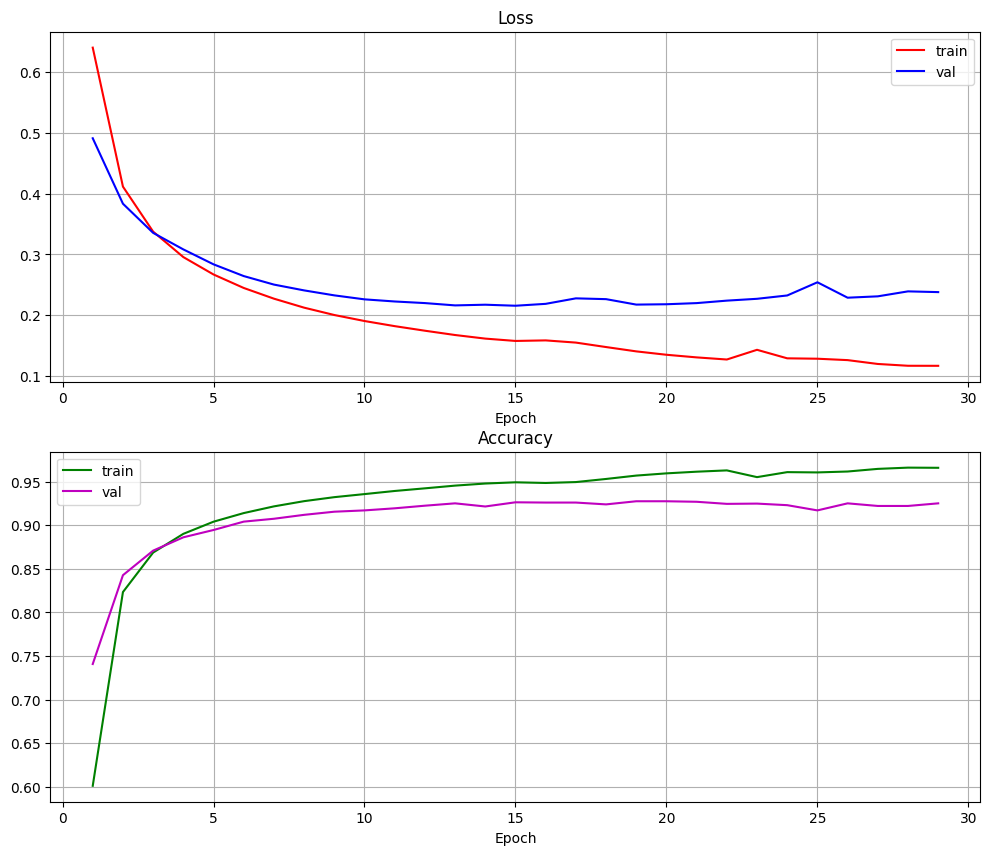

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - Accuracy: 0.9292 - loss: 0.2082


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_basic_model(tf.keras.layers.SimpleRNN,'BasicRNN')

### **Basic LSTM**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - Accuracy: 0.5224 - loss: 0.6907 - val_Accuracy: 0.6205 - val_loss: 0.7364
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.6506 - loss: 0.6221 - val_Accuracy: 0.7825 - val_loss: 0.4965
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.7718 - loss: 0.6623 - val_Accuracy: 0.5779 - val_loss: 0.6520
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.5847 - loss: 0.6447 - val_Accuracy: 0.6052 - val_loss: 0.6313
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.6144 - loss: 0.6241 - val_Accuracy: 0.6334 - val_loss: 0.6130
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.6434 - loss: 0.6055 - val_Accuracy: 0.6571 - val_loss: 0.5970
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.6705 - loss: 0.5890 - val_Accuracy: 0.6781 - val_loss: 0.5837
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.6933 - loss: 0.5750 - val_Acc

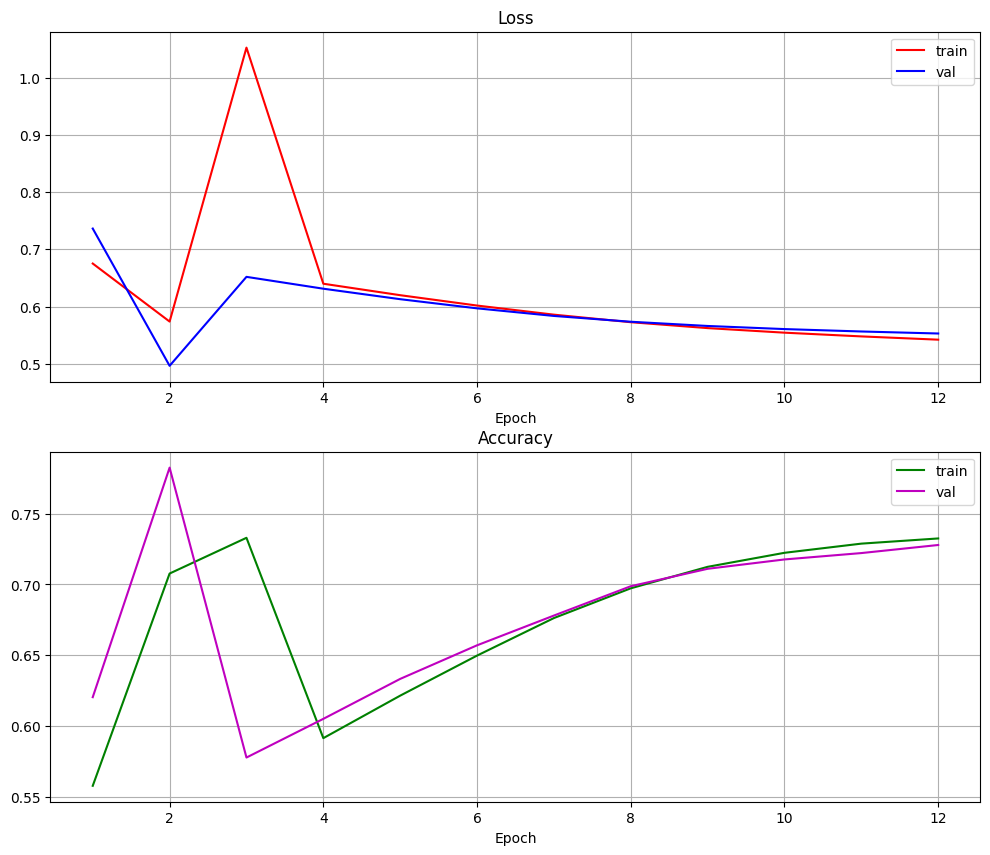

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - Accuracy: 0.7803 - loss: 0.5332


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_basic_model(tf.keras.layers.LSTM,'BasicLSTM')

### **Basic GRU**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - Accuracy: 0.5325 - loss: 0.6882 - val_Accuracy: 0.7702 - val_loss: 0.5511
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - Accuracy: 0.8075 - loss: 0.4636 - val_Accuracy: 0.8449 - val_loss: 0.3811
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - Accuracy: 0.8650 - loss: 0.3380 - val_Accuracy: 0.8755 - val_loss: 0.3250
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - Accuracy: 0.8950 - loss: 0.2813 - val_Accuracy: 0.9001 - val_loss: 0.2740
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - Accuracy: 0.9146 - loss: 0.2407 - val_Accuracy: 0.9097 - val_loss: 0.2462
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - Accuracy: 0.9244 - loss: 0.2194 - val_Accuracy: 0.9193 - val_loss: 0.2321
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - Accuracy: 0.9295 - loss: 0.2069 - val_Accuracy: 0.9235 - val_loss: 0.2234
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - Accuracy: 0.9340 - loss: 0.1983 - 

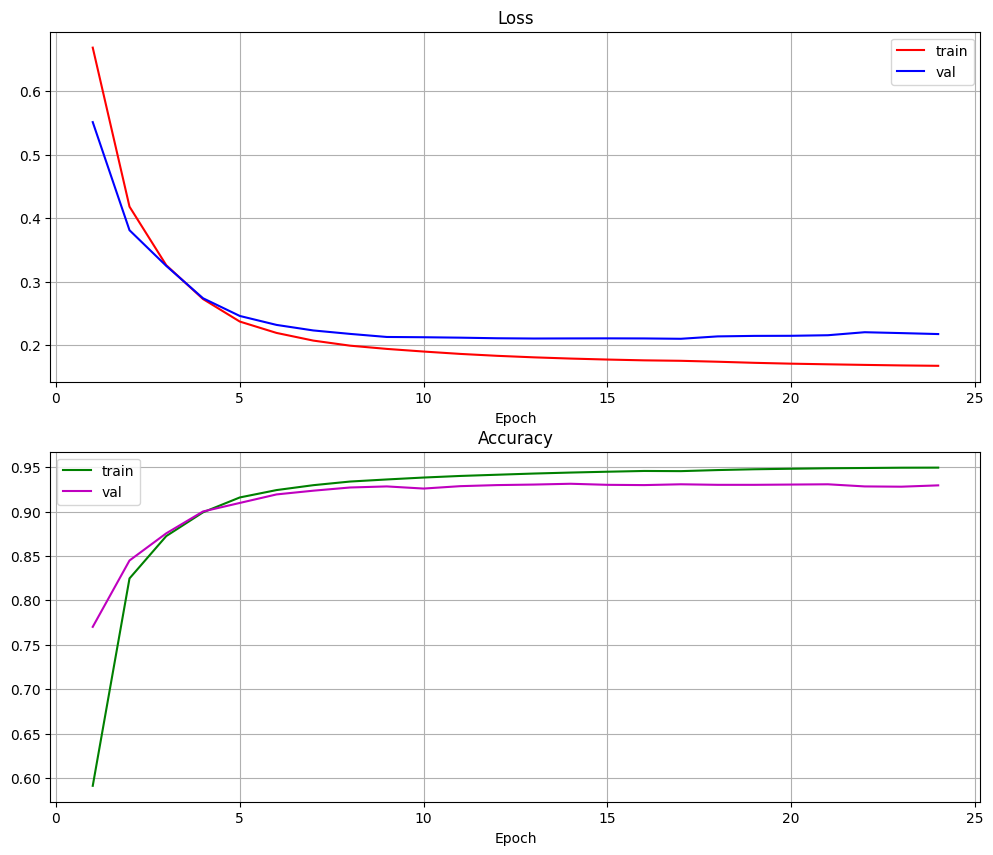

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - Accuracy: 0.9340 - loss: 0.2043


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_basic_model(tf.keras.layers.GRU,'BasicGRU')

### **LSTM with first bidirectional layer**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - Accuracy: 0.5392 - loss: 0.6864 - val_Accuracy: 0.7618 - val_loss: 0.5625
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - Accuracy: 0.7964 - loss: 0.4834 - val_Accuracy: 0.8698 - val_loss: 0.3344
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - Accuracy: 0.8795 - loss: 0.2964 - val_Accuracy: 0.8995 - val_loss: 0.2634
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - Accuracy: 0.9067 - loss: 0.2456 - val_Accuracy: 0.9148 - val_loss: 0.2369
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - Accuracy: 0.9216 - loss: 0.2185 - val_Accuracy: 0.9187 - val_loss: 0.2253
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - Accuracy: 0.9303 - loss: 0.2002 - val_Accuracy: 0.9235 - val_loss: 0.2163
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - Accuracy: 0.9353 - loss: 0.1906 - val_Accuracy: 0.9277 - val_loss: 0.2110
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - Accuracy: 0.9367 - loss: 0.1900 - 

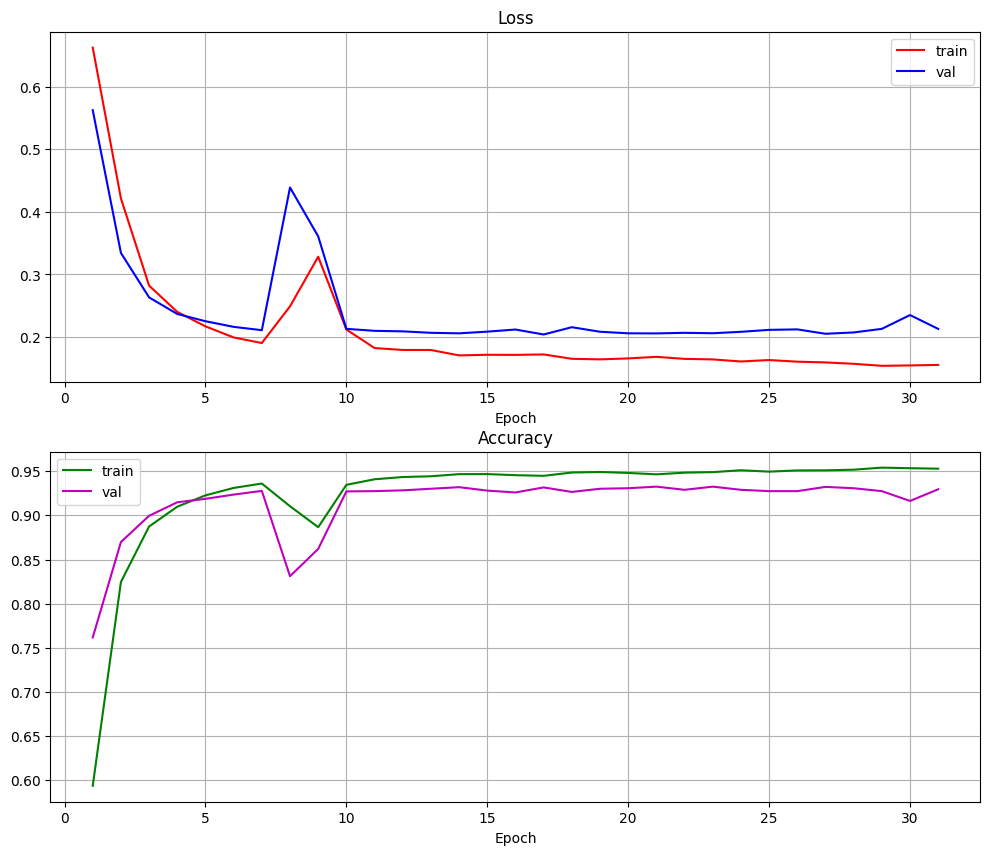

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - Accuracy: 0.9352 - loss: 0.1984


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_first(tf.keras.layers.LSTM,'Bidirectional_LSTM_First')

### **GRU with first bidirectional layer**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 30s 85ms/step - Accuracy: 0.5422 - loss: 0.6886 - val_Accuracy: 0.7741 - val_loss: 0.5447
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - Accuracy: 0.8220 - loss: 0.4196 - val_Accuracy: 0.8773 - val_loss: 0.3070
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - Accuracy: 0.8917 - loss: 0.2846 - val_Accuracy: 0.9034 - val_loss: 0.2606
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - Accuracy: 0.9157 - loss: 0.2367 - val_Accuracy: 0.9136 - val_loss: 0.2340
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - Accuracy: 0.9245 - loss: 0.2160 - val_Accuracy: 0.9220 - val_loss: 0.2214
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - Accuracy: 0.9320 - loss: 0.2002 - val_Accuracy: 0.9262 - val_loss: 0.2131
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - Accuracy: 0.9369 - loss: 0.1907 - val_Accuracy: 0.9307 - val_loss: 0.2087
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - Accuracy: 0.9377 - loss: 0.1876 - 

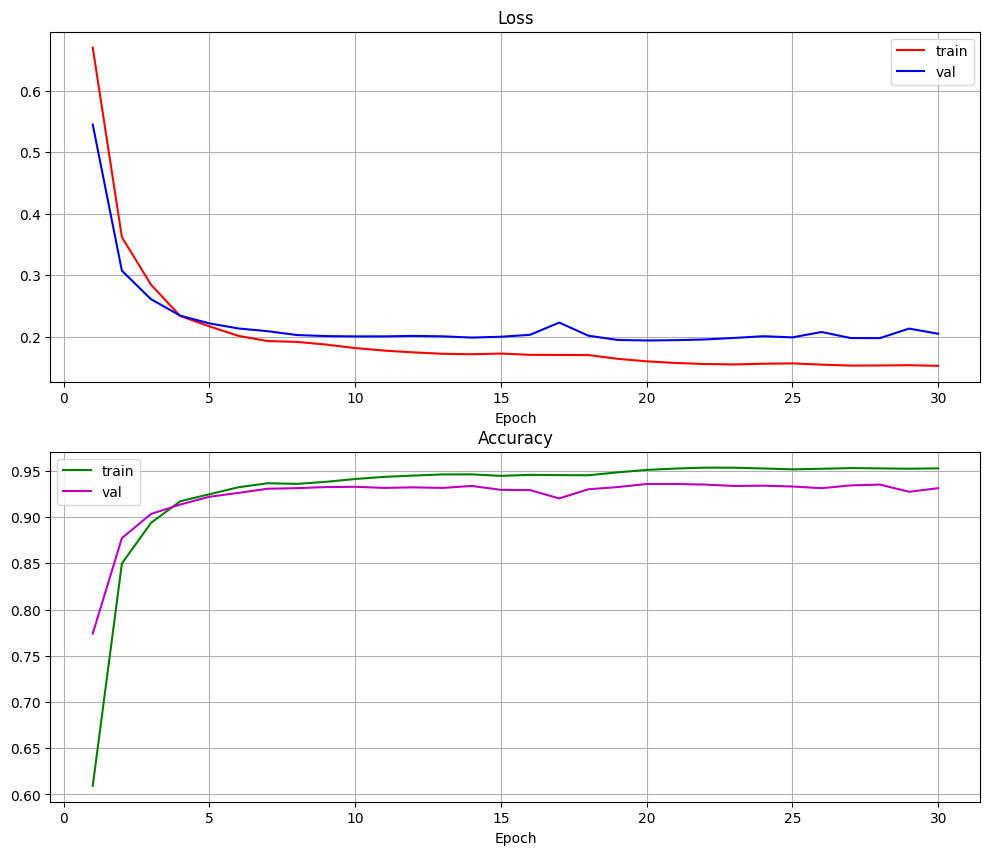

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - Accuracy: 0.9365 - loss: 0.1860


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_first(tf.keras.layers.GRU,'Bidirectional_GRU_First')

### **LSTM with all bidirectional layers**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - Accuracy: 0.5302 - loss: 0.6897 - val_Accuracy: 0.6781 - val_loss: 0.6259
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - Accuracy: 0.6909 - loss: 0.6314 - val_Accuracy: 0.7702 - val_loss: 0.5586
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - Accuracy: 0.7680 - loss: 0.5396 - val_Accuracy: 0.8512 - val_loss: 0.5176
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - Accuracy: 0.8480 - loss: 0.7699 - val_Accuracy: 0.8587 - val_loss: 15.9263
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - Accuracy: 0.6941 - loss: 2.5548 - val_Accuracy: 0.8206 - val_loss: 0.4379
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - Accuracy: 0.8440 - loss: 0.4136 - val_Accuracy: 0.8734 - val_loss: 0.4023
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - Accuracy: 0.8867 - loss: 0.3606 - val_Accuracy: 0.8776 - val_loss: 0.3725
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - Accuracy: 0.8921 - loss: 0.3236 -

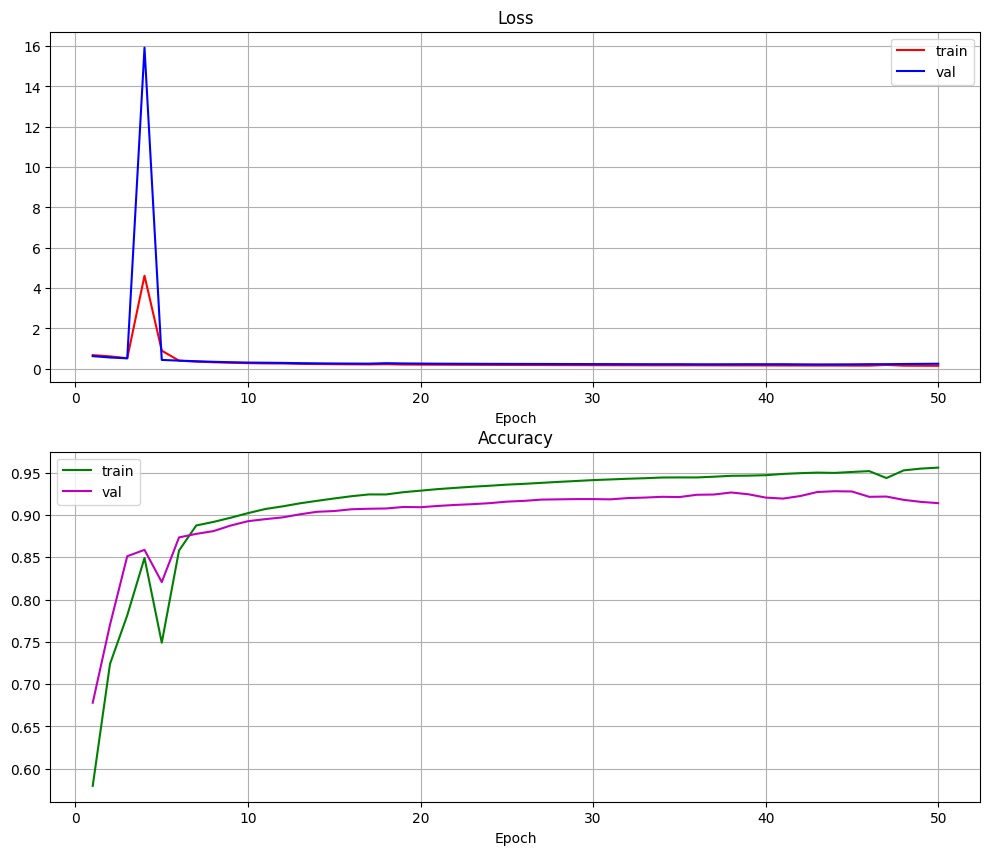

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - Accuracy: 0.9323 - loss: 0.1992


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_all(tf.keras.layers.LSTM,'Bidirectional_LSTM_All')

### **GRU with all bidirectional layers**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - Accuracy: 0.5289 - loss: 0.6893 - val_Accuracy: 0.7738 - val_loss: 0.5492
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - Accuracy: 0.8236 - loss: 0.4258 - val_Accuracy: 0.8902 - val_loss: 0.2891
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - Accuracy: 0.9007 - loss: 0.2652 - val_Accuracy: 0.9073 - val_loss: 0.2504
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - Accuracy: 0.9197 - loss: 0.2278 - val_Accuracy: 0.9112 - val_loss: 0.2405
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - Accuracy: 0.8808 - loss: 0.3448 - val_Accuracy: 0.9127 - val_loss: 0.2451
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - Accuracy: 0.9105 - loss: 0.2499 - val_Accuracy: 0.8821 - val_loss: 0.2933
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - Accuracy: 0.9137 - loss: 0.2393 - val_Accuracy: 0.9160 - val_loss: 0.2347
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - Accuracy: 0.9291 - loss: 0.2140 -

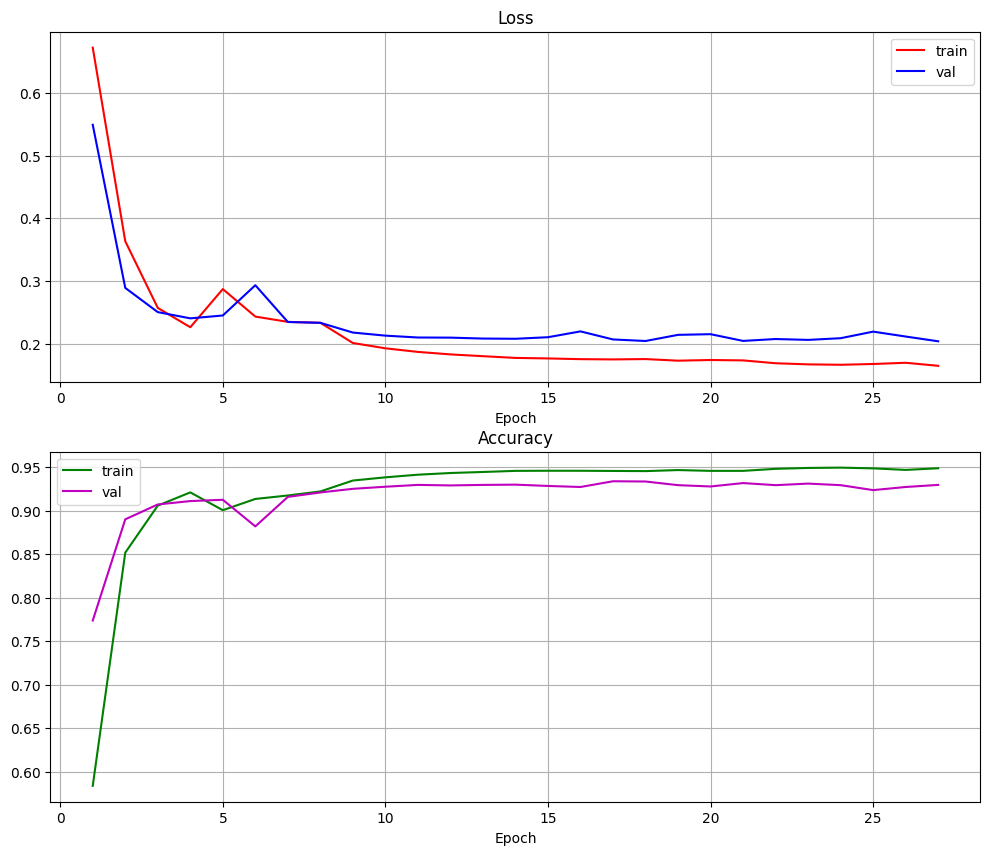

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - Accuracy: 0.9362 - loss: 0.1970


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_all(tf.keras.layers.GRU,'Bidirectional_GRU_All')

### **Summarizing results**

In [ ]:
results=np.array([test_accuracies,test_losses,times]).T
table=pd.DataFrame(index=configs,data=results,columns=['Test_Accuracy','Test_Loss','Elapsed_Time'])
display(table)

,Test_Accuracy,Test_Loss,Elapsed_Time
BasicRNN,0.921416,0.225754,191.097
BasicLSTM,0.778644,0.527253,107.597
BasicGRU,0.927714,0.218298,288.458
Bidirectional_LSTM_First,0.929214,0.214028,350.250
Bidirectional_GRU_First,0.930714,0.199617,479.940
Bidirectional_LSTM_All,0.924115,0.217200,818.304
Bidirectional_GRU_All,0.929814,0.211319,636.938


# **Working with sequences of length 57 tokens**

In [ ]:
max_len=3*(df['text'].str.split(' ').str.len().max()//4)
print(max_len)
pad_sequences=tf.keras.utils.pad_sequences(sequences,padding='pre',truncating='post',maxlen=max_len)
n_tweets=10
for i in range(n_tweets):
    print(texts[i])
    print(pad_sequences[i])
    print('\n')

57
rising of covid does not alarm me rising death rate does more testing capacity more are and and mild are is in scary place go check out their
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 1867    5  140  159   12 3665   19 1867   69  784  159   55 1029
 1856   55   17    4    4 3666   17    6    7  298  308  109  588   51
   59]


please vote for marking independence of democracy human secularism
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  128  887   10    1 2294    5  897  299
 2635]


wishing all of you as sab ko in most of
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0

## **Splitting data on train,test and validation set**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(pad_sequences,y,train_size=0.95)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(126657, 57)
(3333, 57)
(3334, 57)


## **Transforming data into TensorFlow datasets**

In [ ]:
BATCH_SIZE=512
train_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_train),tf.convert_to_tensor(y_train))).batch(BATCH_SIZE)
val_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_val),tf.convert_to_tensor(y_val))).batch(BATCH_SIZE)
test_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_test),tf.convert_to_tensor(y_test))).batch(BATCH_SIZE)

## **Running experiments for different networks**

In [ ]:
configs=[]
test_losses=[]
test_accuracies=[]
times=[]

### **Basic RNN**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - Accuracy: 0.5569 - loss: 0.6773 - val_Accuracy: 0.7906 - val_loss: 0.4836
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - Accuracy: 0.8123 - loss: 0.4363 - val_Accuracy: 0.8515 - val_loss: 0.3615
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - Accuracy: 0.8712 - loss: 0.3276 - val_Accuracy: 0.8809 - val_loss: 0.3083
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - Accuracy: 0.8954 - loss: 0.2827 - val_Accuracy: 0.8983 - val_loss: 0.2797
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - Accuracy: 0.9090 - loss: 0.2551 - val_Accuracy: 0.9070 - val_loss: 0.2607
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - Accuracy: 0.9186 - loss: 0.2341 - val_Accuracy: 0.9130 - val_loss: 0.2473
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - Accuracy: 0.9254 - loss: 0.2180 - val_Accuracy: 0.9181 - val_loss: 0.2384
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - Accuracy: 0.9307 - loss: 0.2057 - val_Acc

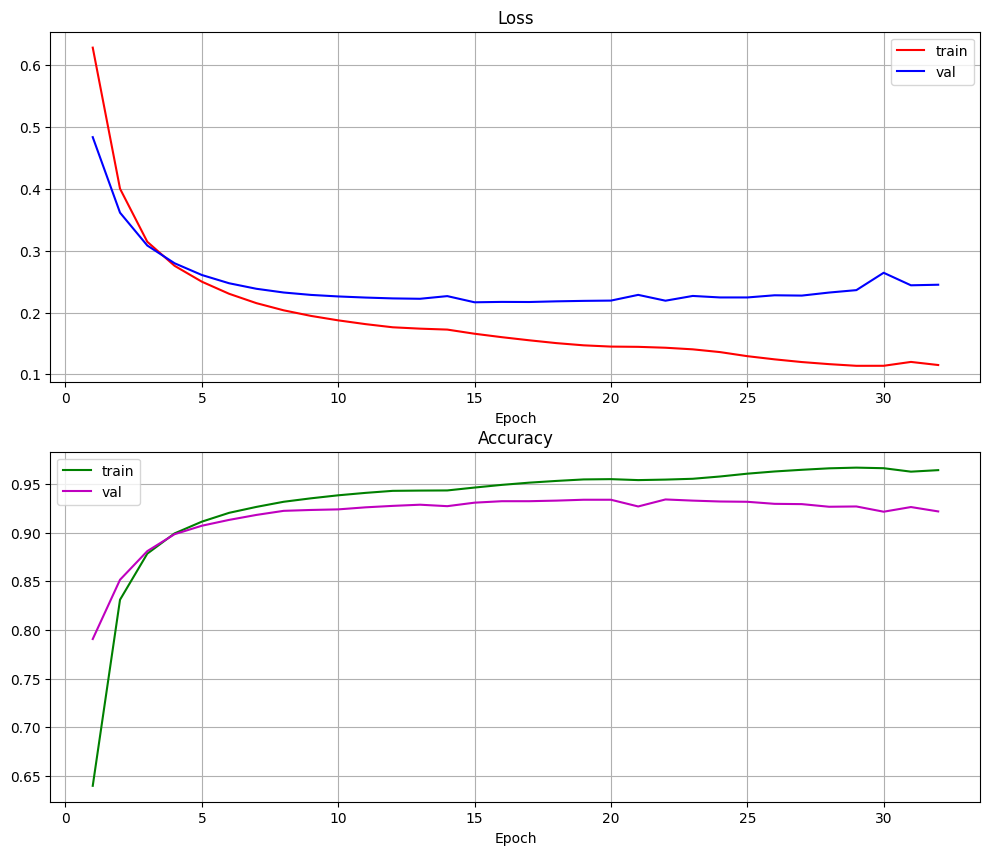

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - Accuracy: 0.9272 - loss: 0.2276


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_basic_model(tf.keras.layers.SimpleRNN,'BasicRNN')

### **Basic LSTM**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - Accuracy: 0.5374 - loss: 0.6914 - val_Accuracy: 0.6082 - val_loss: 0.6534
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.6474 - loss: 0.6275 - val_Accuracy: 0.7813 - val_loss: 0.5348
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.7881 - loss: 0.4719 - val_Accuracy: 0.8311 - val_loss: 0.3868
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - Accuracy: 0.8578 - loss: 0.3474 - val_Accuracy: 0.8524 - val_loss: 0.3342
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.8894 - loss: 0.2882 - val_Accuracy: 0.8926 - val_loss: 0.2813
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.9059 - loss: 0.2542 - val_Accuracy: 0.8590 - val_loss: 0.3322
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.9028 - loss: 0.2640 - val_Accuracy: 0.9085 - val_loss: 0.2448
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.9213 - loss: 0.2227 - val_Acc

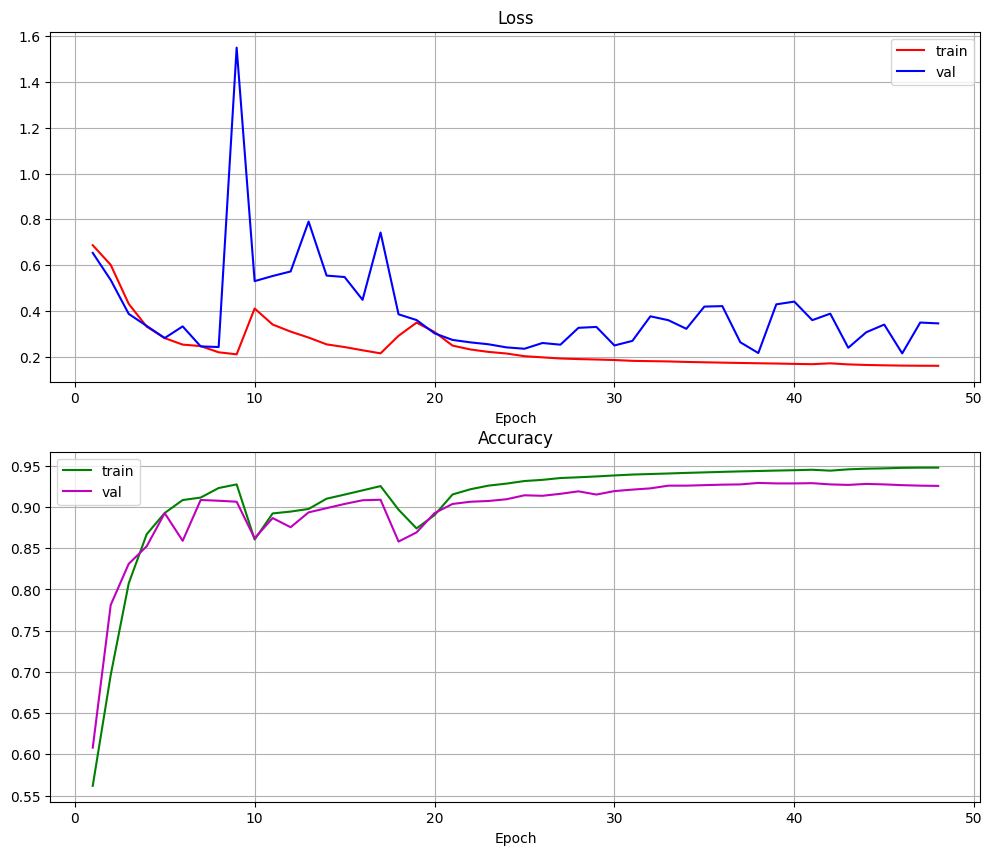

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - Accuracy: 0.9218 - loss: 0.2263


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_basic_model(tf.keras.layers.LSTM,'BasicLSTM')

### **Basic GRU**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - Accuracy: 0.5340 - loss: 0.6881 - val_Accuracy: 0.7627 - val_loss: 0.5441
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - Accuracy: 0.8012 - loss: 0.4522 - val_Accuracy: 0.8482 - val_loss: 0.3683
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - Accuracy: 0.8616 - loss: 0.3391 - val_Accuracy: 0.8725 - val_loss: 0.3206
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - Accuracy: 0.8884 - loss: 0.2901 - val_Accuracy: 0.8914 - val_loss: 0.2843
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - Accuracy: 0.9078 - loss: 0.2522 - val_Accuracy: 0.9019 - val_loss: 0.2570
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - Accuracy: 0.9195 - loss: 0.2287 - val_Accuracy: 0.9106 - val_loss: 0.2416
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - Accuracy: 0.9270 - loss: 0.2146 - val_Accuracy: 0.9181 - val_loss: 0.2323
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - Accuracy: 0.9313 - loss: 0.2048 - val_Ac

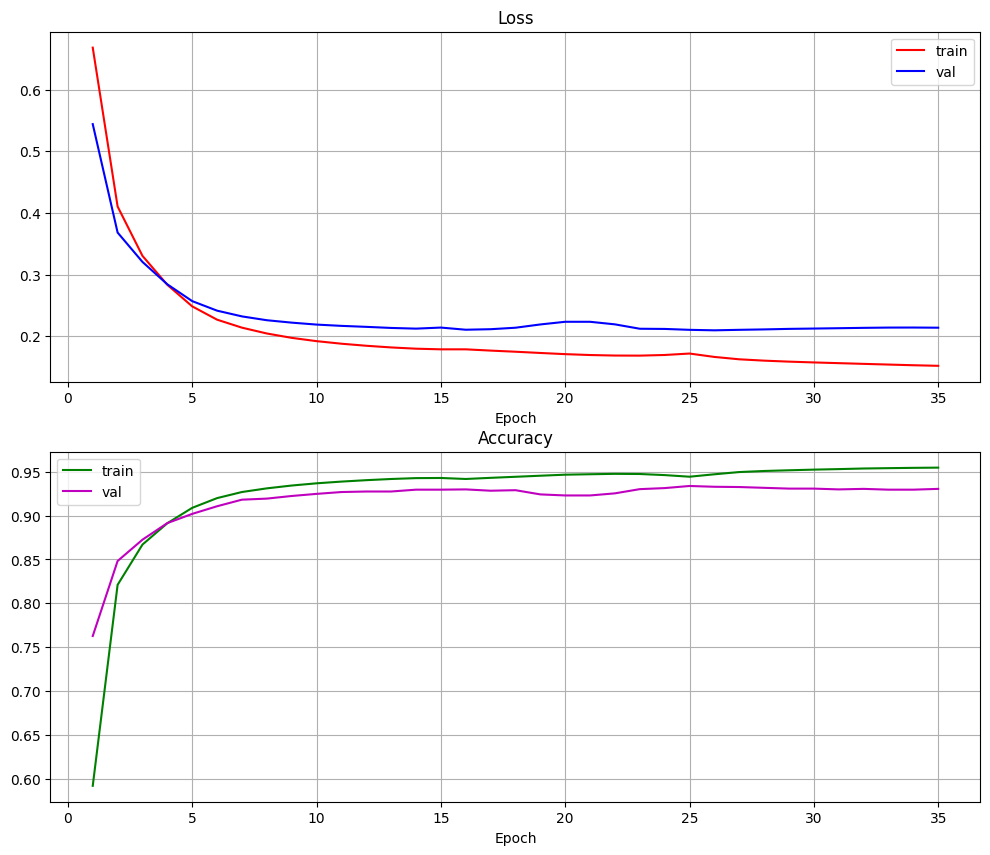

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - Accuracy: 0.9287 - loss: 0.2064


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_basic_model(tf.keras.layers.GRU,'BasicGRU')

### **LSTM with first bidirectional layer**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - Accuracy: 0.5387 - loss: 0.6868 - val_Accuracy: 0.8251 - val_loss: 0.4273
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.8465 - loss: 0.3687 - val_Accuracy: 0.8878 - val_loss: 0.2844
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.9019 - loss: 0.2592 - val_Accuracy: 0.9082 - val_loss: 0.2499
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.9194 - loss: 0.2213 - val_Accuracy: 0.9148 - val_loss: 0.2356
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.9277 - loss: 0.2049 - val_Accuracy: 0.9238 - val_loss: 0.2181
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.9330 - loss: 0.1952 - val_Accuracy: 0.9223 - val_loss: 0.2172
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.9383 - loss: 0.1927 - val_Accuracy: 0.9208 - val_loss: 0.2200
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.9424 - loss: 0.1778 - val_Acc

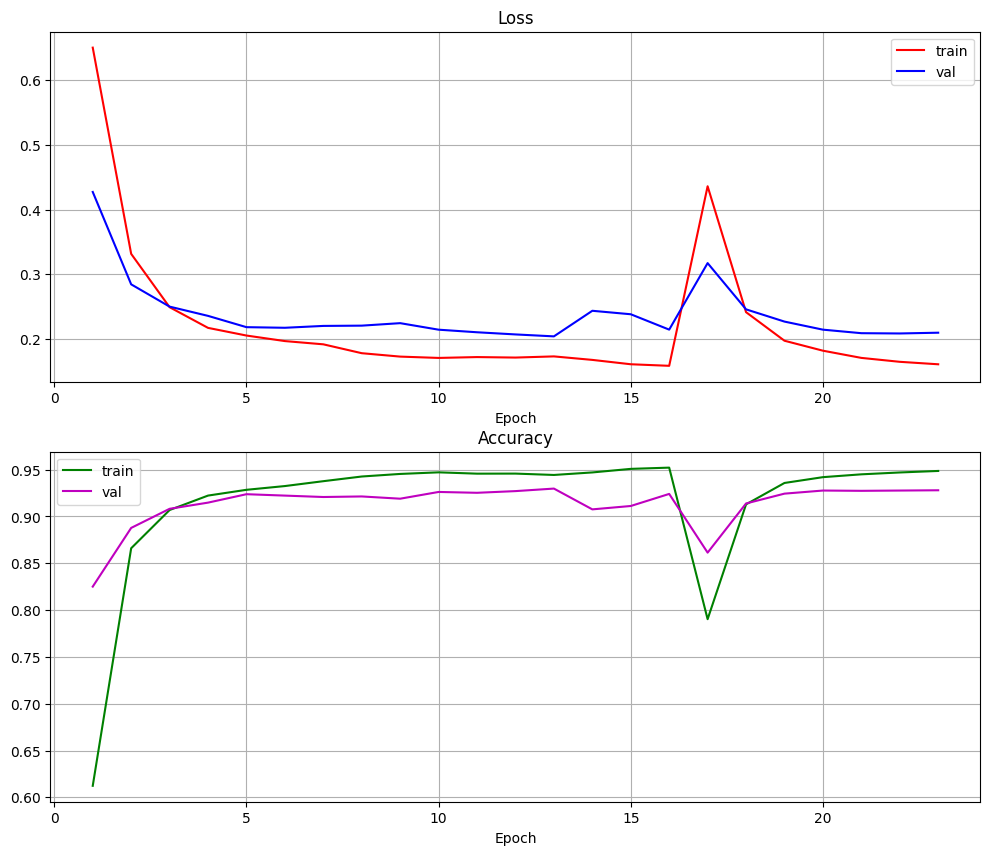

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - Accuracy: 0.9304 - loss: 0.1991


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_first(tf.keras.layers.LSTM,'Bidirectional_LSTM_First')

### **GRU with first bidirectional layer**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - Accuracy: 0.5481 - loss: 0.6887 - val_Accuracy: 0.7840 - val_loss: 0.5494
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - Accuracy: 0.8263 - loss: 0.4285 - val_Accuracy: 0.8845 - val_loss: 0.3019
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - Accuracy: 0.8981 - loss: 0.2745 - val_Accuracy: 0.9049 - val_loss: 0.2587
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - Accuracy: 0.9174 - loss: 0.2357 - val_Accuracy: 0.9130 - val_loss: 0.2385
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - Accuracy: 0.9269 - loss: 0.2152 - val_Accuracy: 0.9172 - val_loss: 0.2294
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - Accuracy: 0.9325 - loss: 0.2028 - val_Accuracy: 0.9157 - val_loss: 0.2304
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - Accuracy: 0.9361 - loss: 0.1955 - val_Accuracy: 0.9220 - val_loss: 0.2230
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - Accuracy: 0.9391 - loss: 0.1899 - 

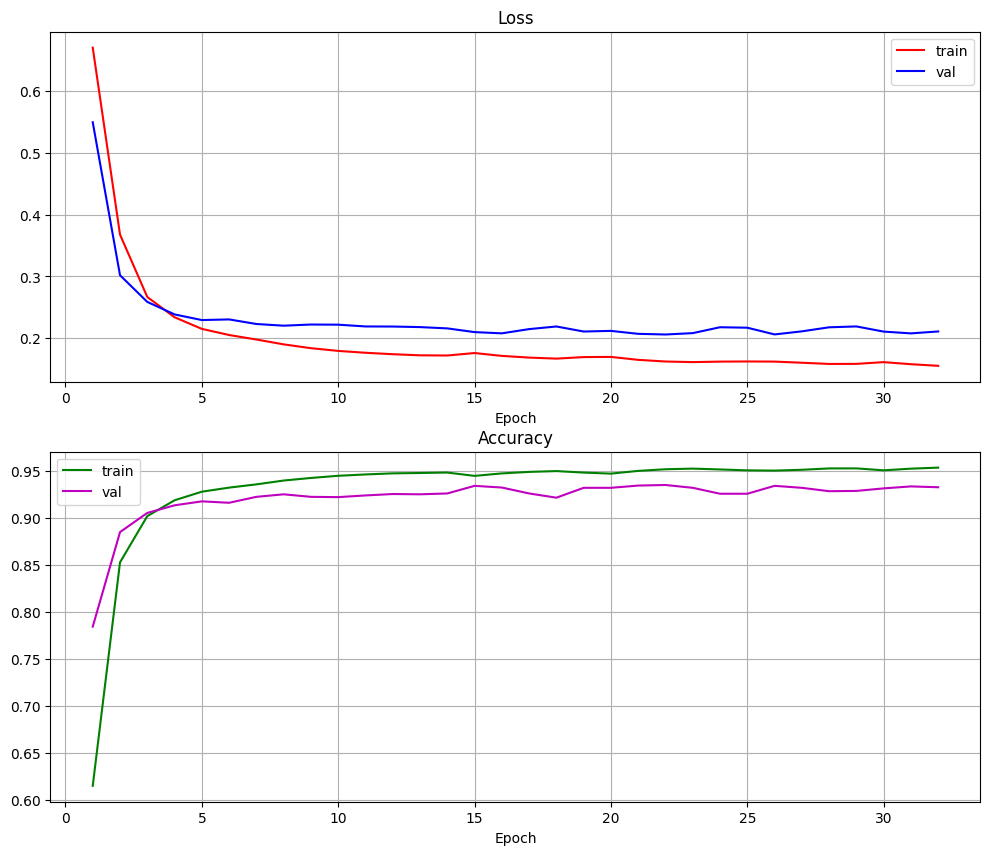

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - Accuracy: 0.9303 - loss: 0.2072


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_first(tf.keras.layers.GRU,'Bidirectional_GRU_First')

### **LSTM with all bidirectional layers**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - Accuracy: 0.5209 - loss: 0.6885 - val_Accuracy: 0.7450 - val_loss: 0.5848
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - Accuracy: 0.8051 - loss: 0.4570 - val_Accuracy: 0.8851 - val_loss: 0.3030
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - Accuracy: 0.8937 - loss: 0.2724 - val_Accuracy: 0.9109 - val_loss: 0.2522
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - Accuracy: 0.9186 - loss: 0.2249 - val_Accuracy: 0.9109 - val_loss: 0.2386
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - Accuracy: 0.9270 - loss: 0.2072 - val_Accuracy: 0.9238 - val_loss: 0.2158
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - Accuracy: 0.9333 - loss: 0.1942 - val_Accuracy: 0.9277 - val_loss: 0.2096
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - Accuracy: 0.9391 - loss: 0.1840 - val_Accuracy: 0.9292 - val_loss: 0.2091
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - Accuracy: 0.9415 - loss: 0.1798 - 

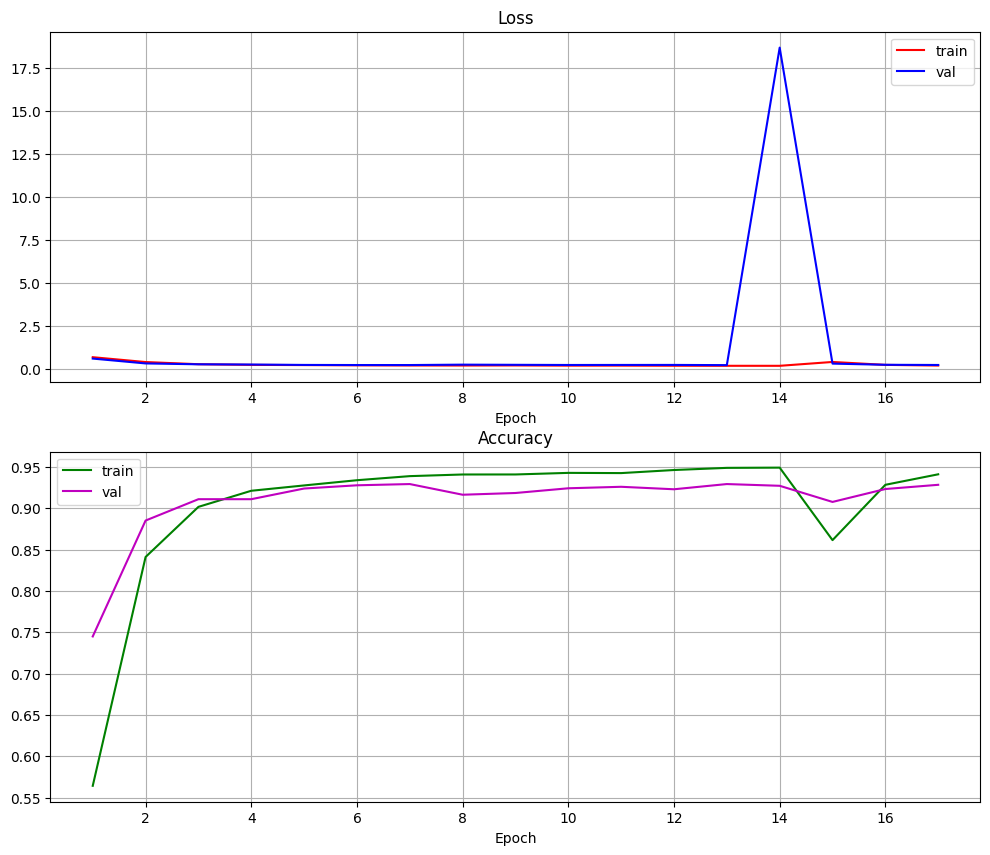

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - Accuracy: 0.9240 - loss: 0.2104


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_all(tf.keras.layers.LSTM,'Bidirectional_LSTM_All')

### **GRU with all bidirectional layers**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - Accuracy: 0.5214 - loss: 0.6900 - val_Accuracy: 0.7621 - val_loss: 0.5757
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - Accuracy: 0.8196 - loss: 0.4346 - val_Accuracy: 0.8758 - val_loss: 0.3033
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - Accuracy: 0.8978 - loss: 0.2697 - val_Accuracy: 0.9055 - val_loss: 0.2535
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - Accuracy: 0.9194 - loss: 0.2265 - val_Accuracy: 0.9208 - val_loss: 0.2322
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - Accuracy: 0.9289 - loss: 0.2073 - val_Accuracy: 0.9253 - val_loss: 0.2198
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - Accuracy: 0.9353 - loss: 0.1950 - val_Accuracy: 0.9244 - val_loss: 0.2152
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - Accuracy: 0.9386 - loss: 0.1869 - val_Accuracy: 0.9271 - val_loss: 0.2123
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - Accuracy: 0.9417 - loss: 0.1815 -

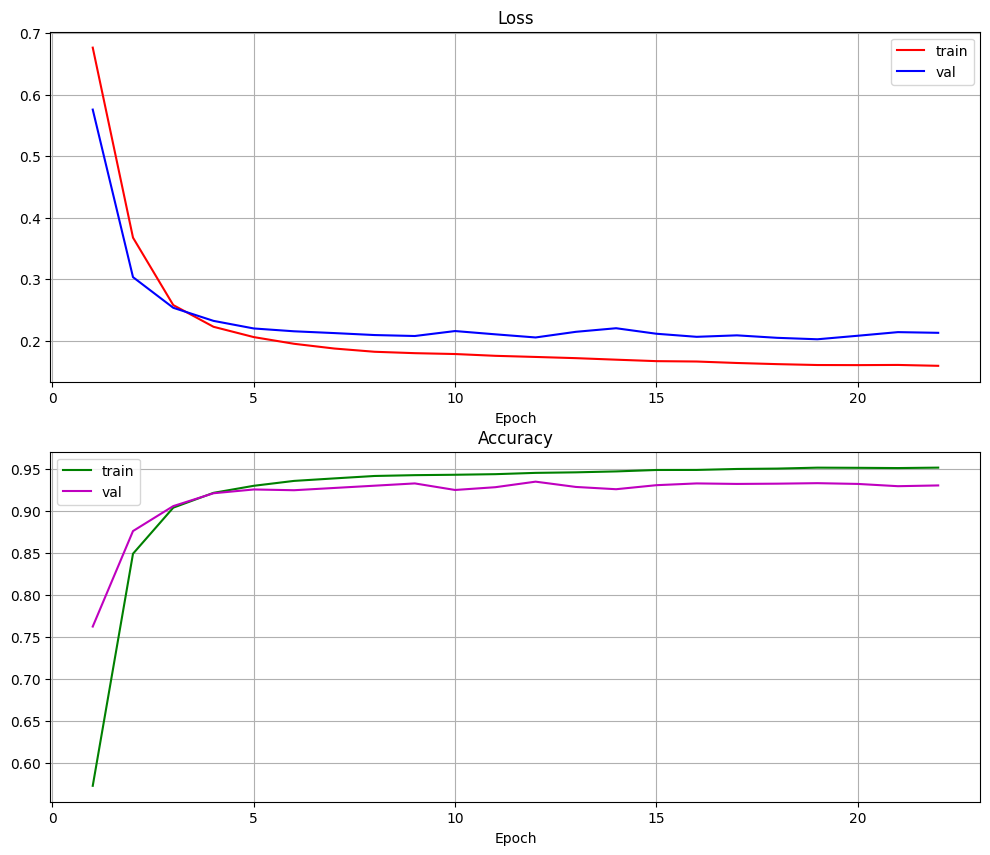

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - Accuracy: 0.9288 - loss: 0.2013


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_all(tf.keras.layers.GRU,'Bidirectional_GRU_All')

## **Summarizing results**

In [ ]:
results=np.array([test_accuracies,test_losses,times]).T
table=pd.DataFrame(index=configs,data=results,columns=['Test_Accuracy','Test_Loss','Elapsed_Time'])
display(table)

,Test_Accuracy,Test_Loss,Elapsed_Time
BasicRNN,0.928614,0.223100,158.550
BasicLSTM,0.921716,0.225039,305.071
BasicGRU,0.930114,0.202168,320.860
Bidirectional_LSTM_First,0.931614,0.195250,197.355
Bidirectional_GRU_First,0.930414,0.202481,381.722
Bidirectional_LSTM_All,0.925615,0.205006,222.731
Bidirectional_GRU_All,0.930714,0.198294,396.416


# **Working with sequences of length 38 tokens**

In [ ]:
max_len=df['text'].str.split(' ').str.len().max()//2
print(max_len)
pad_sequences=tf.keras.utils.pad_sequences(sequences,padding='pre',truncating='post',maxlen=max_len)
n_tweets=10
for i in range(n_tweets):
    print(texts[i])
    print(pad_sequences[i])
    print('\n')

38
rising of covid does not alarm me rising death rate does more testing capacity more are and and mild are is in scary place go check out their
[   0    0    0    0    0    0    0    0    0    0 1867    5  140  159
   12 3665   19 1867   69  784  159   55 1029 1856   55   17    4    4
 3666   17    6    7  298  308  109  588   51   59]


please vote for marking independence of democracy human secularism
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  128  887   10    1 2294    5  897  299 2635]


wishing all of you as sab ko in most of
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 1174   23    5    9   34 3488 1114    7  127    5]


daily in top for first time covid
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 

## **Splitting data on train, test and validation set**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(pad_sequences,y,train_size=0.95)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(126657, 38)
(3333, 38)
(3334, 38)


## **Transforming data into TensorFlow datasets**

In [ ]:
BATCH_SIZE=512
train_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_train),tf.convert_to_tensor(y_train))).batch(BATCH_SIZE)
val_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_val),tf.convert_to_tensor(y_val))).batch(BATCH_SIZE)
test_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_test),tf.convert_to_tensor(y_test))).batch(BATCH_SIZE)

## **Running experiments for different networks**

In [ ]:
configs=[]
test_losses=[]
test_accuracies=[]
times=[]

### **Basic RNN**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - Accuracy: 0.5306 - loss: 0.6897 - val_Accuracy: 0.7642 - val_loss: 0.4970
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - Accuracy: 0.7988 - loss: 0.4464 - val_Accuracy: 0.8602 - val_loss: 0.3305
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - Accuracy: 0.8733 - loss: 0.3184 - val_Accuracy: 0.8821 - val_loss: 0.2918
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - Accuracy: 0.8978 - loss: 0.2719 - val_Accuracy: 0.8944 - val_loss: 0.2723
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - Accuracy: 0.9107 - loss: 0.2449 - val_Accuracy: 0.9022 - val_loss: 0.2606
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - Accuracy: 0.9203 - loss: 0.2263 - val_Accuracy: 0.9055 - val_loss: 0.2524
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - Accuracy: 0.9268 - loss: 0.2122 - val_Accuracy: 0.9085 - val_loss: 0.2458
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - Accuracy: 0.9314 - loss: 0.2010 - val_Acc

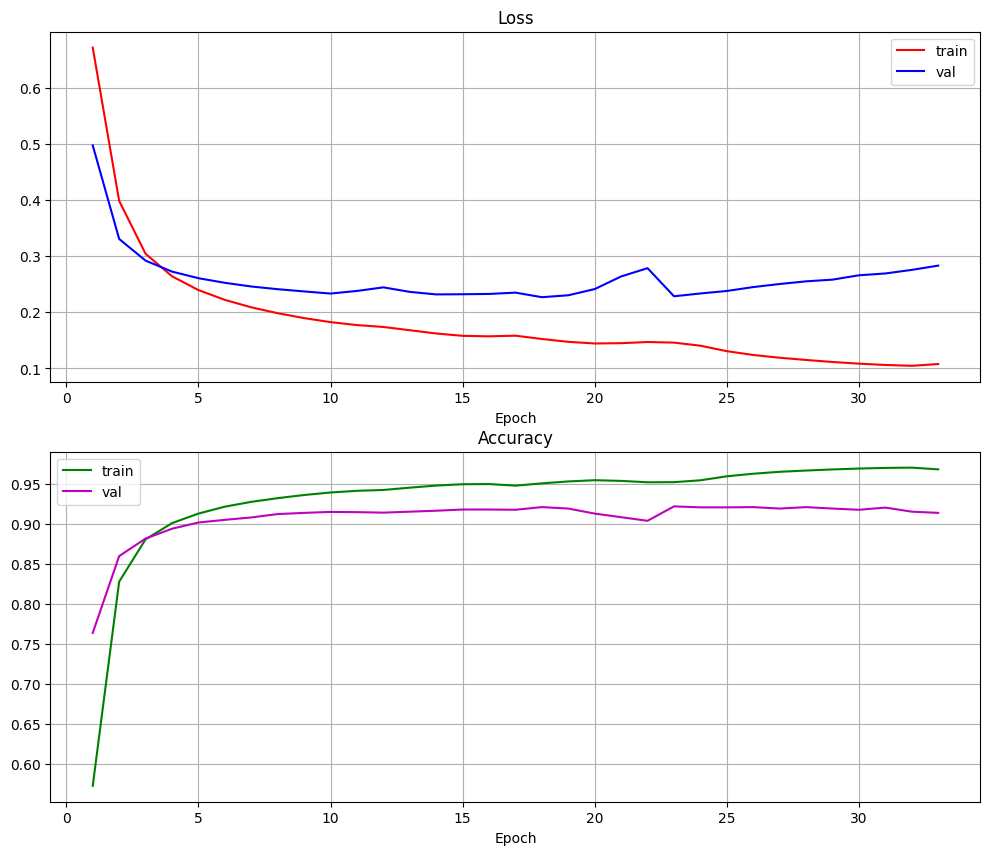

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - Accuracy: 0.9333 - loss: 0.2037


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_basic_model(tf.keras.layers.SimpleRNN,'BasicRNN')

### **Basic LSTM**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - Accuracy: 0.5289 - loss: 0.6882 - val_Accuracy: 0.7729 - val_loss: 0.5528
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - Accuracy: 0.7536 - loss: 0.5136 - val_Accuracy: 0.8194 - val_loss: 0.4217
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - Accuracy: 0.8229 - loss: 0.4164 - val_Accuracy: 0.8401 - val_loss: 0.3849
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - Accuracy: 0.8451 - loss: 0.3720 - val_Accuracy: 0.8581 - val_loss: 0.3418
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - Accuracy: 0.8707 - loss: 0.3244 - val_Accuracy: 0.8578 - val_loss: 0.3283
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - Accuracy: 0.8841 - loss: 0.2963 - val_Accuracy: 0.8863 - val_loss: 0.3001
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - Accuracy: 0.8971 - loss: 0.2763 - val_Accuracy: 0.8959 - val_loss: 0.2777
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - Accuracy: 0.9052 - loss: 0.2534 - val_Acc

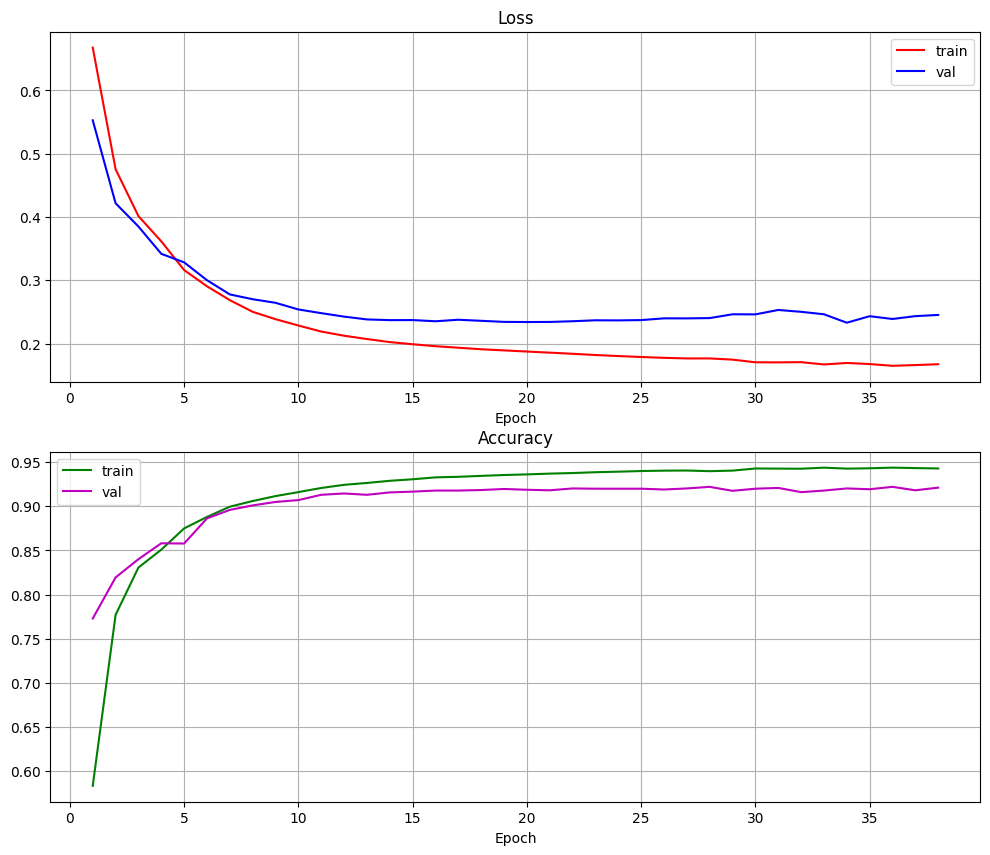

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - Accuracy: 0.9341 - loss: 0.2018


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_basic_model(tf.keras.layers.LSTM,'BasicLSTM')

### **Basic GRU**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - Accuracy: 0.5413 - loss: 0.6896 - val_Accuracy: 0.7729 - val_loss: 0.5704
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - Accuracy: 0.7977 - loss: 0.4654 - val_Accuracy: 0.8509 - val_loss: 0.3484
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.8584 - loss: 0.3443 - val_Accuracy: 0.8782 - val_loss: 0.3085
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.8861 - loss: 0.2992 - val_Accuracy: 0.8932 - val_loss: 0.2794
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.9033 - loss: 0.2650 - val_Accuracy: 0.9064 - val_loss: 0.2561
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.9168 - loss: 0.2386 - val_Accuracy: 0.9151 - val_loss: 0.2408
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.9253 - loss: 0.2218 - val_Accuracy: 0.9208 - val_loss: 0.2329
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - Accuracy: 0.9299 - loss: 0.2121 - val_Ac

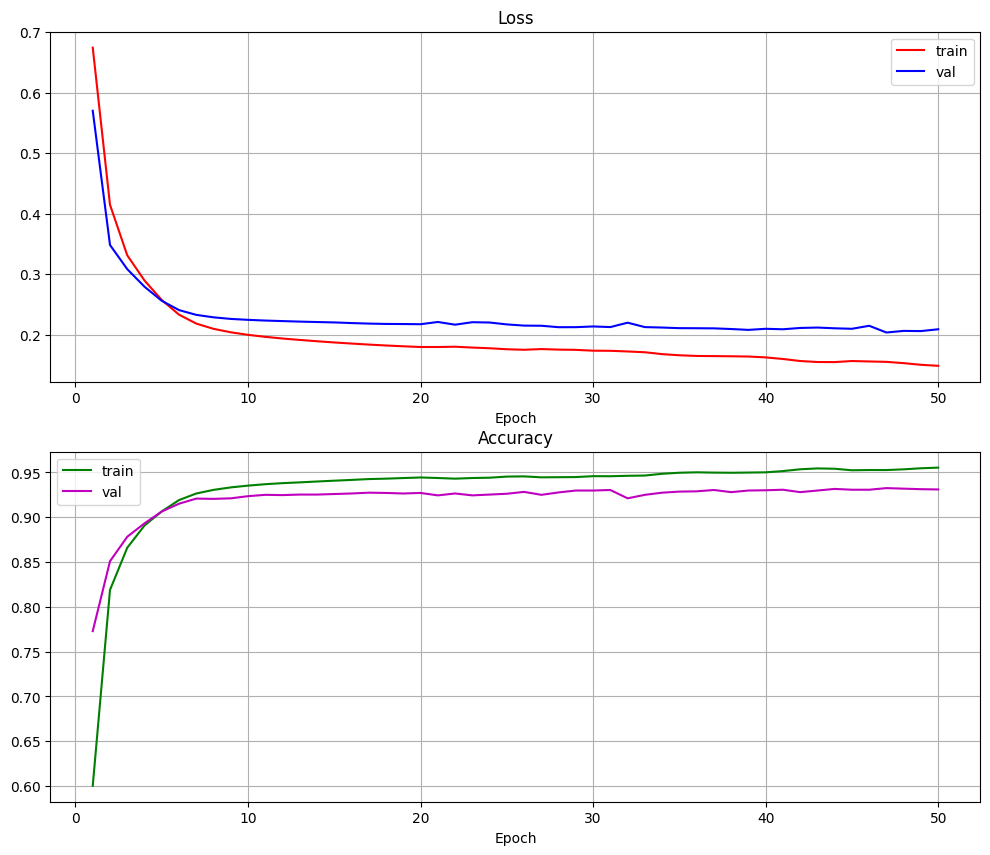

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - Accuracy: 0.9400 - loss: 0.1849


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_basic_model(tf.keras.layers.GRU,'BasicGRU')

### **LSTM with first bidirectional layer**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - Accuracy: 0.5419 - loss: 0.6934 - val_Accuracy: 0.8218 - val_loss: 0.4823
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - Accuracy: 0.8349 - loss: 0.4071 - val_Accuracy: 0.8788 - val_loss: 0.3086
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - Accuracy: 0.8833 - loss: 0.2951 - val_Accuracy: 0.8962 - val_loss: 0.2711
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - Accuracy: 0.9024 - loss: 0.2570 - val_Accuracy: 0.9052 - val_loss: 0.2546
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - Accuracy: 0.9130 - loss: 0.2370 - val_Accuracy: 0.9103 - val_loss: 0.2429
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - Accuracy: 0.9191 - loss: 0.2253 - val_Accuracy: 0.9127 - val_loss: 0.2366
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - Accuracy: 0.9239 - loss: 0.2169 - val_Accuracy: 0.9142 - val_loss: 0.2414
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - Accuracy: 0.9272 - loss: 0.2104 - val_Acc

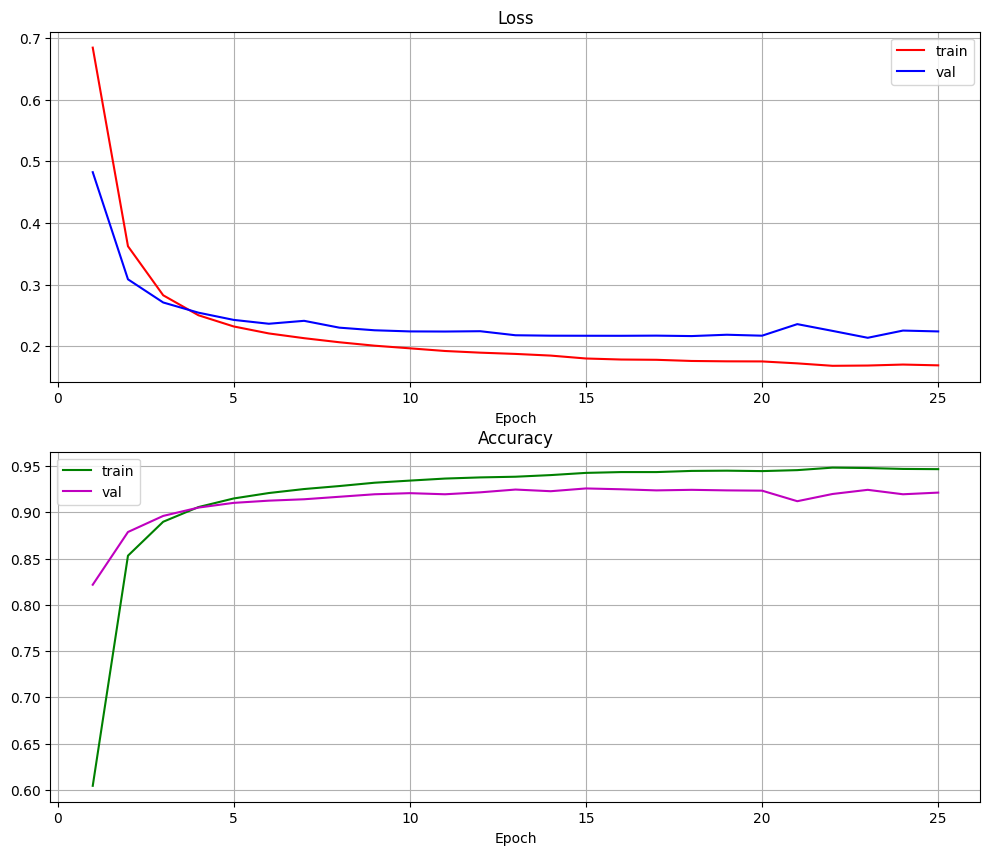

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - Accuracy: 0.9302 - loss: 0.2009


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_first(tf.keras.layers.LSTM,'Bidirectional_LSTM_First')

### **GRU with first bidirectional layer**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - Accuracy: 0.5270 - loss: 0.6880 - val_Accuracy: 0.7801 - val_loss: 0.5255
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.8285 - loss: 0.4219 - val_Accuracy: 0.8869 - val_loss: 0.2889
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.8960 - loss: 0.2757 - val_Accuracy: 0.9100 - val_loss: 0.2528
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.9150 - loss: 0.2388 - val_Accuracy: 0.9163 - val_loss: 0.2372
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.9242 - loss: 0.2204 - val_Accuracy: 0.9190 - val_loss: 0.2287
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.9297 - loss: 0.2093 - val_Accuracy: 0.9214 - val_loss: 0.2246
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.9339 - loss: 0.2012 - val_Accuracy: 0.9220 - val_loss: 0.2223
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - Accuracy: 0.9367 - loss: 0.1953 - val_Acc

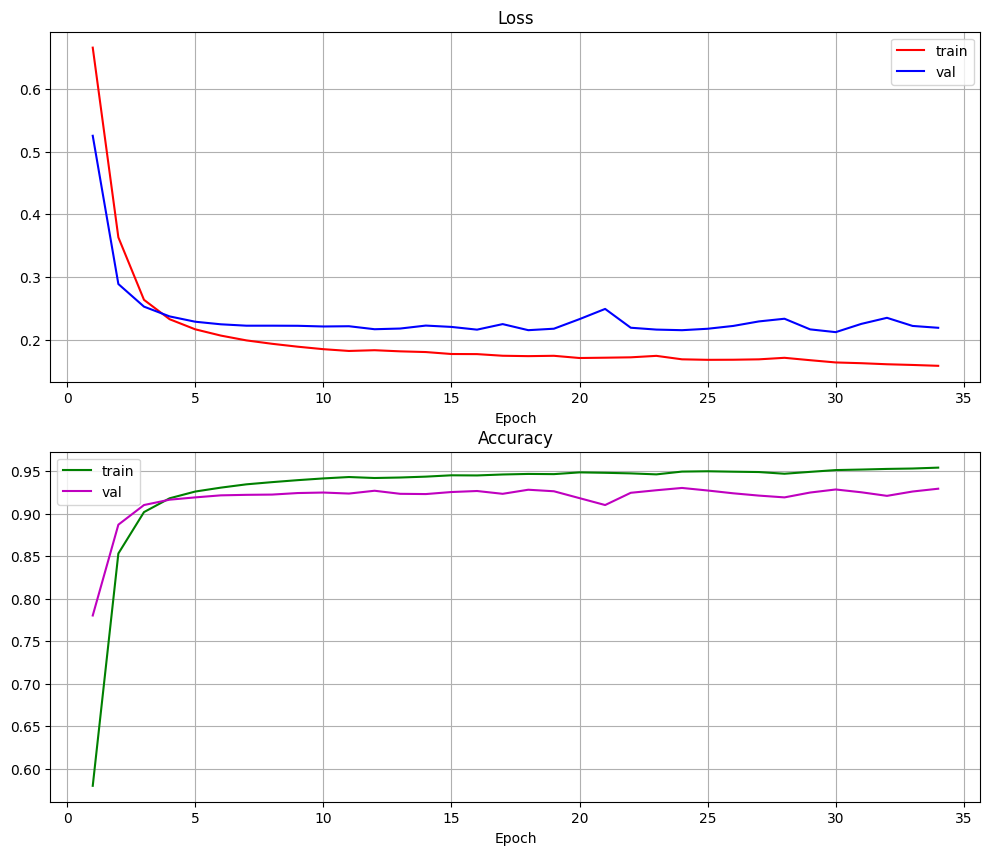

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - Accuracy: 0.9342 - loss: 0.1972


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_first(tf.keras.layers.GRU,'Bidirectional_GRU_First')

### **LSTM with all bidirectional layers**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - Accuracy: 0.5359 - loss: 0.6867 - val_Accuracy: 0.8182 - val_loss: 0.4853
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.8403 - loss: 0.3945 - val_Accuracy: 0.8902 - val_loss: 0.2845
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.8952 - loss: 0.2706 - val_Accuracy: 0.9064 - val_loss: 0.2494
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.9142 - loss: 0.2329 - val_Accuracy: 0.9115 - val_loss: 0.2395
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.9236 - loss: 0.2154 - val_Accuracy: 0.9148 - val_loss: 0.2308
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.9299 - loss: 0.2035 - val_Accuracy: 0.9202 - val_loss: 0.2235
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.9352 - loss: 0.1943 - val_Accuracy: 0.9205 - val_loss: 0.2210
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - Accuracy: 0.9378 - loss: 0.1901 - val_Acc

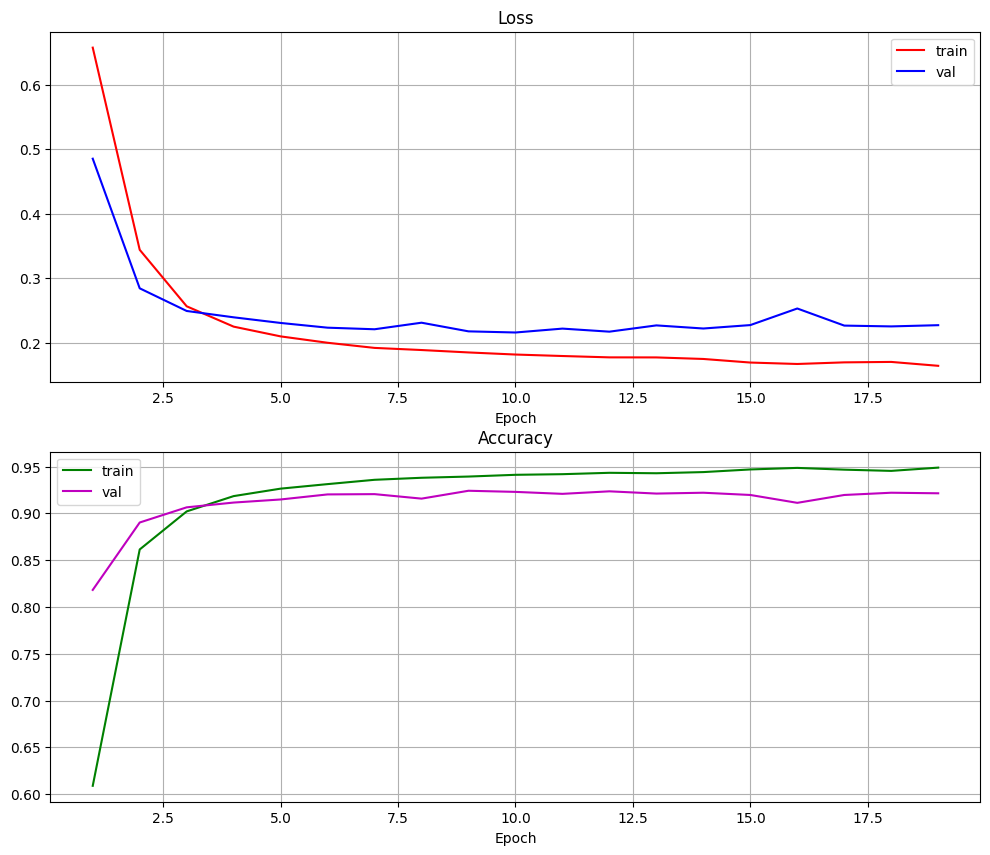

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - Accuracy: 0.9349 - loss: 0.1991


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_all(tf.keras.layers.LSTM,'Bidirectional_LSTM_All')

### **GRU with all bidirectional layers**

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 32s 77ms/step - Accuracy: 0.5277 - loss: 0.6896 - val_Accuracy: 0.7696 - val_loss: 0.5480
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - Accuracy: 0.8252 - loss: 0.4175 - val_Accuracy: 0.8959 - val_loss: 0.2824
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - Accuracy: 0.8990 - loss: 0.2690 - val_Accuracy: 0.9133 - val_loss: 0.2439
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - Accuracy: 0.9177 - loss: 0.2312 - val_Accuracy: 0.9202 - val_loss: 0.2291
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - Accuracy: 0.9258 - loss: 0.2142 - val_Accuracy: 0.9232 - val_loss: 0.2232
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - Accuracy: 0.9312 - loss: 0.2050 - val_Accuracy: 0.9220 - val_loss: 0.2202
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - Accuracy: 0.9343 - loss: 0.1991 - val_Accuracy: 0.9223 - val_loss: 0.2190
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - Accuracy: 0.9358 - loss: 0.1951 - 

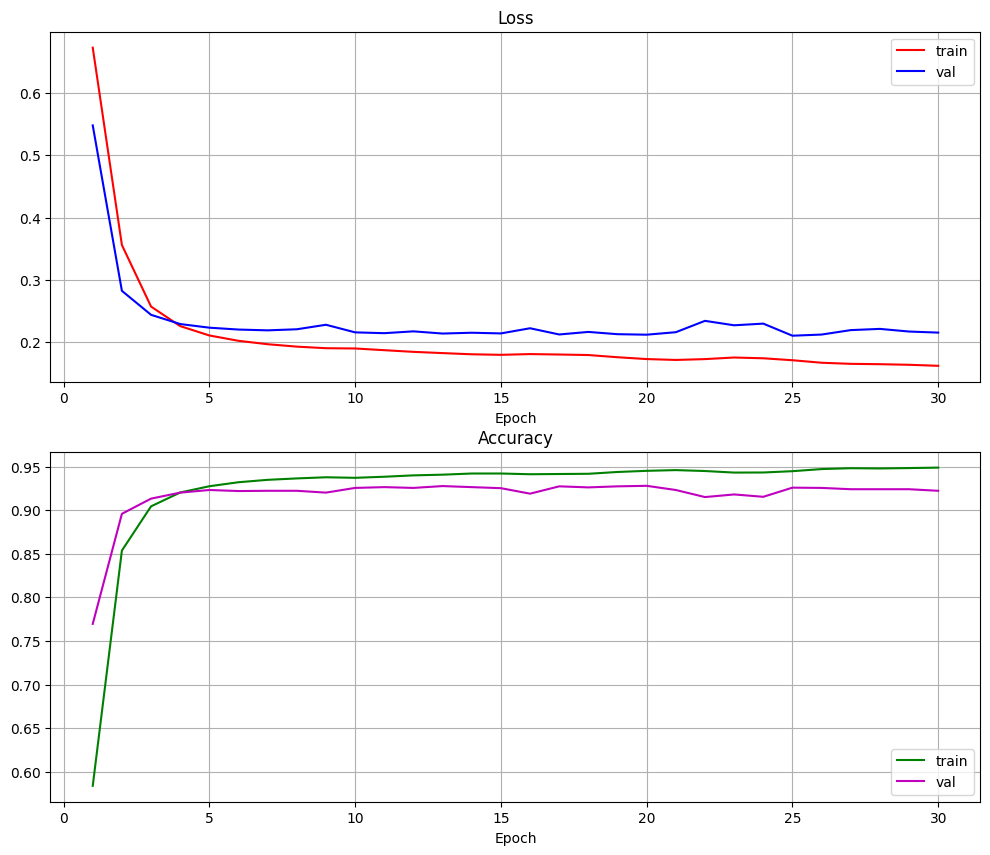

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - Accuracy: 0.9300 - loss: 0.1983


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_Accuracy',mode='max',patience=10,min_delta=0,restore_best_weights=True)
run_experiment_bidirectional_model_all(tf.keras.layers.GRU,'Bidirectional_GRU_All')

## **Summarizing results**

In [ ]:
results=np.array([test_accuracies,test_losses,times]).T
table=pd.DataFrame(index=configs,data=results,columns=['Test_Accuracy','Test_Loss','Elapsed_Time'])
display(table)

,Test_Accuracy,Test_Loss,Elapsed_Time
BasicRNN,0.928014,0.218218,118.015
BasicLSTM,0.928914,0.211956,173.529
BasicGRU,0.932214,0.199210,316.983
Bidirectional_LSTM_First,0.924715,0.211870,150.298
Bidirectional_GRU_First,0.930414,0.205943,282.545
Bidirectional_LSTM_All,0.930414,0.208252,174.795
Bidirectional_GRU_All,0.925015,0.212006,366.404
